In [1]:
from keras.models import load_model
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pickle
import cv2

In [2]:
!pip install numpy argparse opencv-python-headless keras

  Obtaining dependency information for argparse from https://files.pythonhosted.org/packages/f2/94/3af39d34be01a24a6e65433d19e107099374224905f1e0cc6bbe1fd22a2f/argparse-1.4.0-py2.py3-none-any.whl.metadata
  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
  Obtaining dependency information for opencv-python-headless from https://files.pythonhosted.org/packages/20/44/458a0a135866f5e08266566b32ad9a182a7a059a894effe6c41a9c841ff1/opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)
Using cached opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl (38.5 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Ajithabh Krishna\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [5]:
import numpy as np
import argparse
import pickle
import cv2
import os
import time
from keras.models import load_model
from collections import deque
import matplotlib.pyplot as plt

def real_time_detection():
    if not os.path.exists('output'):
        os.mkdir('output')

    print("Loading model ...")
    model = load_model('modelnewOriginal.h5')
    Q = deque(maxlen=128)
    vs = cv2.VideoCapture(0)  # Use the default webcam (index 0)
    writer = None
    (W, H) = (None, None)

    while True:
        (grabbed, frame) = vs.read()

        if not grabbed:
            break

        if W is None or H is None:
            (H, W) = frame.shape[:2]

        output = frame.copy()

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cv2.resize(frame, (128, 128)).astype("float32")
        frame = frame.reshape(128, 128, 3) / 255

        preds = model.predict(np.expand_dims(frame, axis=0))[0]
        Q.append(preds)

        results = np.array(Q).mean(axis=0)
        i = (preds > 0.50)[0]
        label = i

        text_color = (0, 255, 0)  # default : green

        if label:
            text_color = (0, 0, 255)  # red
        else:
            text_color = (0, 255, 0)

        text = "Violence: {}".format(label)
        FONT = cv2.FONT_HERSHEY_SIMPLEX

        cv2.putText(output, text, (35, 50), FONT, 1.25, text_color, 3)

        # Show the output frame in a separate window
        cv2.imshow("Real-Time Detection", output)

        if writer is None:
            fourcc = cv2.VideoWriter_fourcc(*"MJPG")
            writer = cv2.VideoWriter("output/v_output.avi", fourcc, 30, (W, H), True)

        writer.write(output)

        key = cv2.waitKey(1) & 0xFF

        if key == ord("q"):
            break

    print("[INFO] cleaning up...")
    writer.release()
    vs.release()
    cv2.destroyAllWindows()  # Close all OpenCV windows

# Run real-time detection
real_time_detection()


Loading model ...
1/1 [==============================] - 0s 48ms/step
[INFO] cleaning up...


Loading model ...
1/1 [==============================] - 2s 2s/step


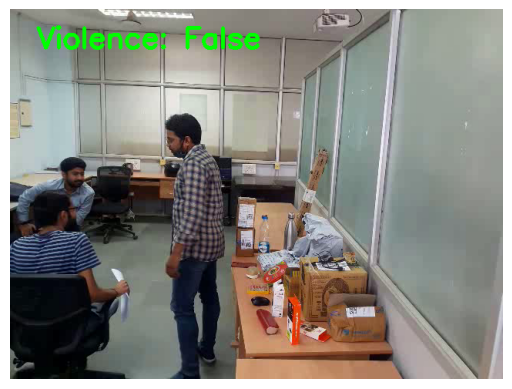

1/1 [==============================] - 0s 83ms/step


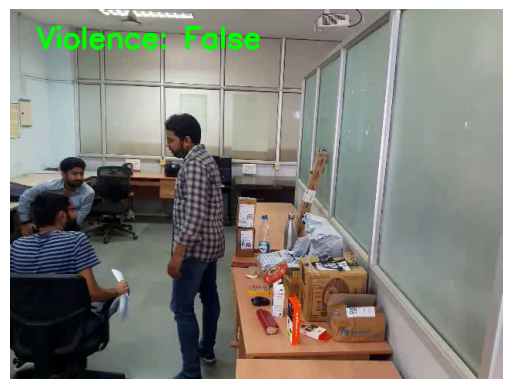

1/1 [==============================] - 0s 79ms/step


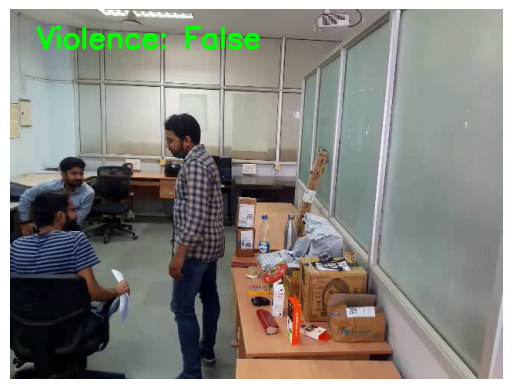

1/1 [==============================] - 0s 93ms/step


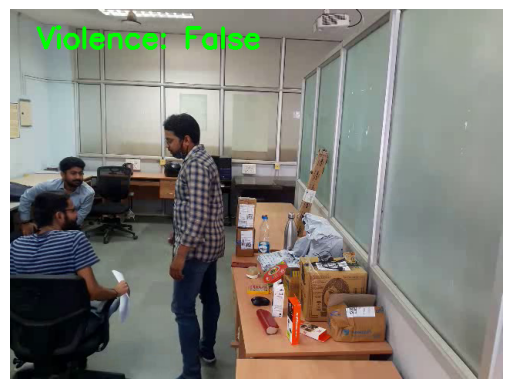

1/1 [==============================] - 0s 102ms/step


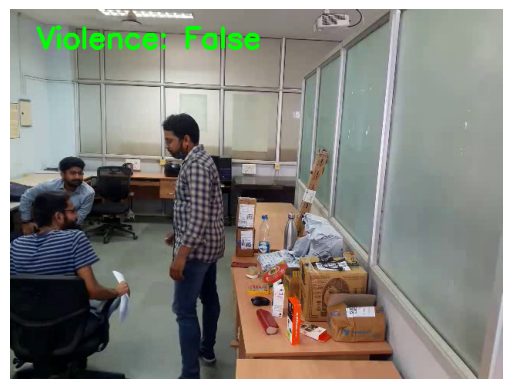

1/1 [==============================] - 0s 79ms/step


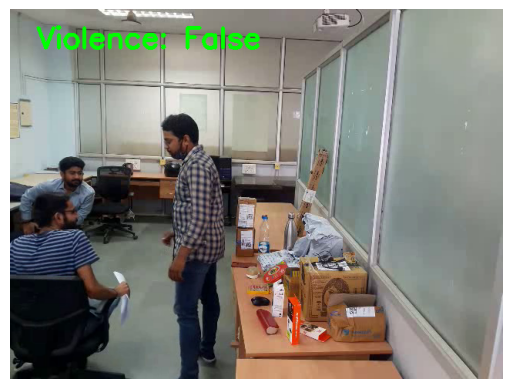

1/1 [==============================] - 0s 79ms/step


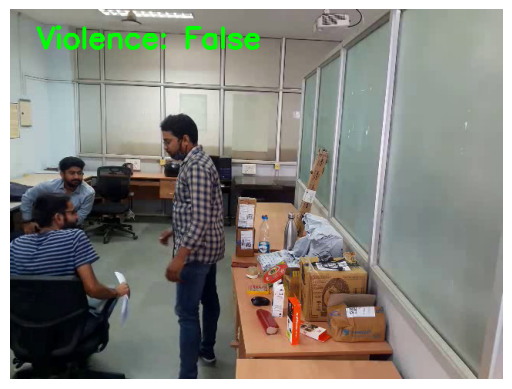

1/1 [==============================] - 0s 90ms/step


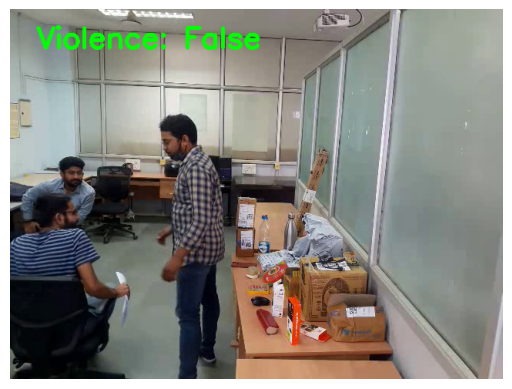

1/1 [==============================] - 0s 89ms/step


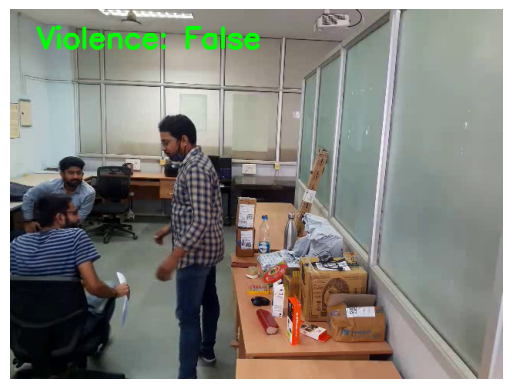

1/1 [==============================] - 0s 88ms/step


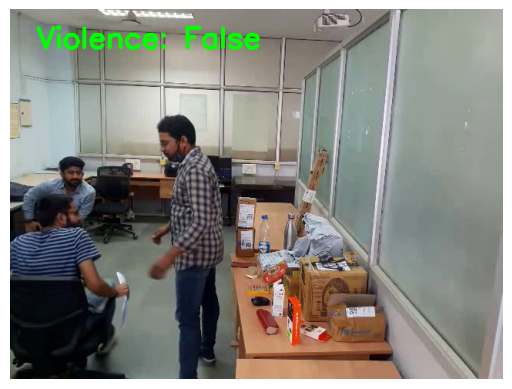

1/1 [==============================] - 0s 105ms/step


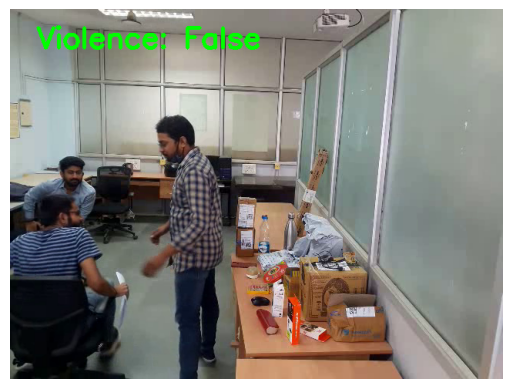

1/1 [==============================] - 0s 83ms/step


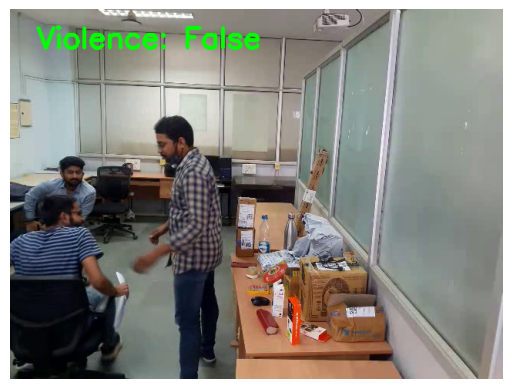

1/1 [==============================] - 0s 92ms/step


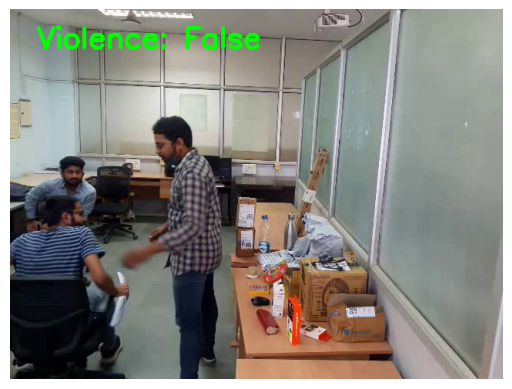

1/1 [==============================] - 0s 92ms/step


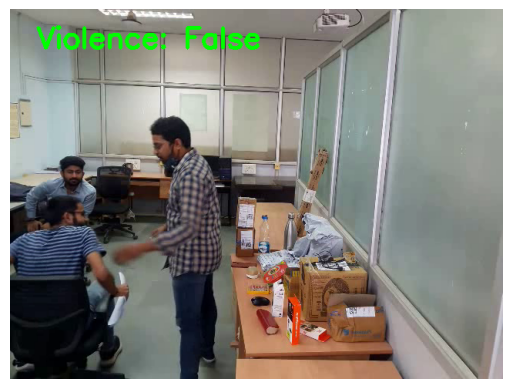

1/1 [==============================] - 0s 91ms/step


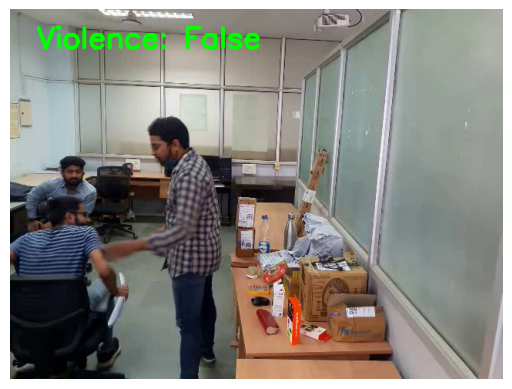

1/1 [==============================] - 0s 94ms/step


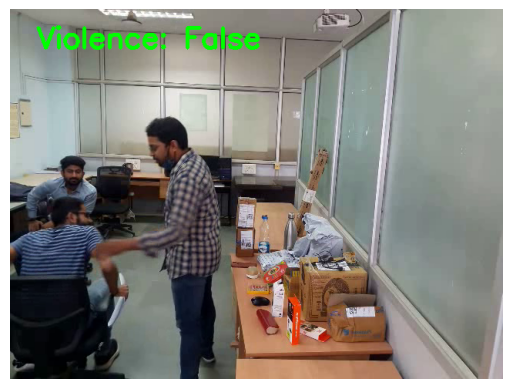

1/1 [==============================] - 0s 90ms/step


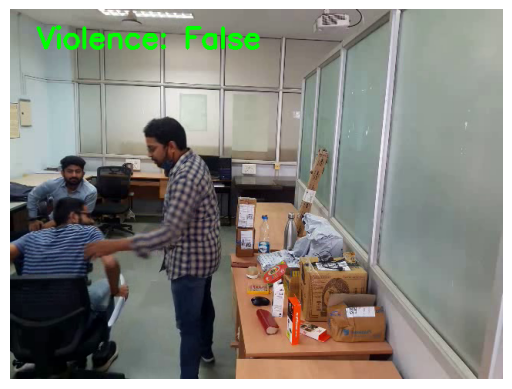

1/1 [==============================] - 0s 89ms/step


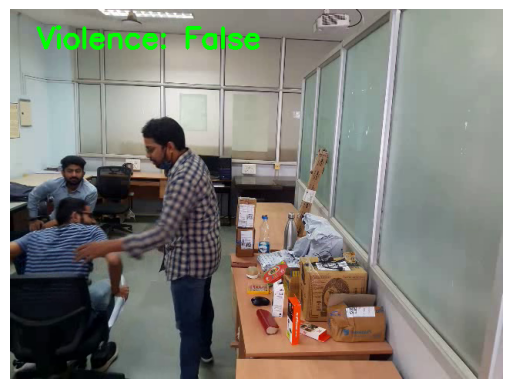

1/1 [==============================] - 0s 78ms/step


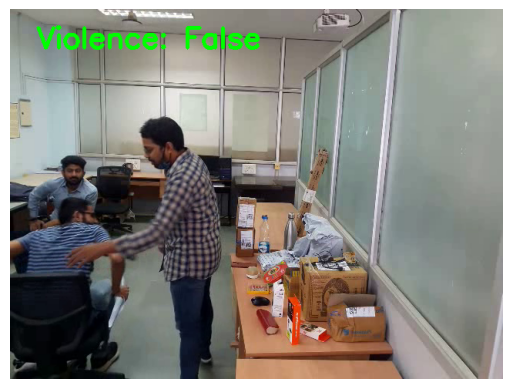

1/1 [==============================] - 0s 98ms/step


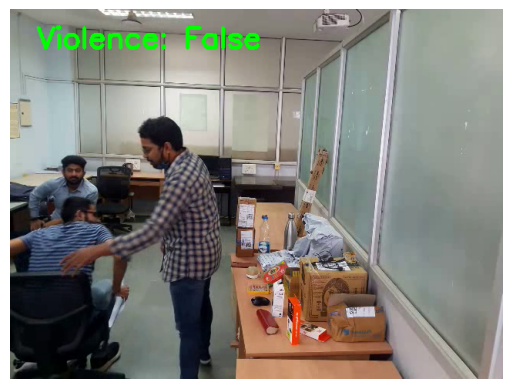

1/1 [==============================] - 0s 88ms/step


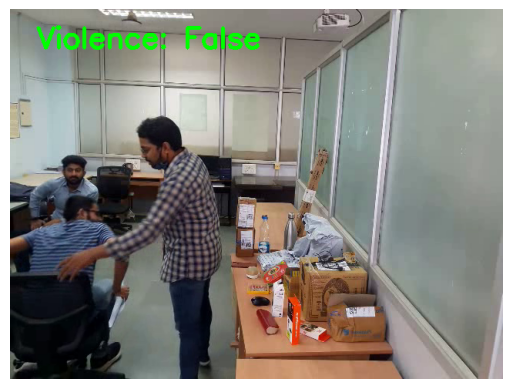

1/1 [==============================] - 0s 90ms/step


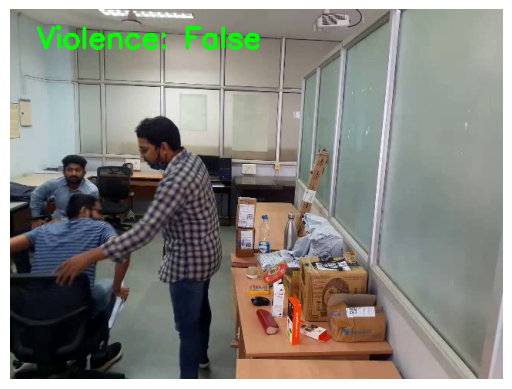

1/1 [==============================] - 0s 90ms/step


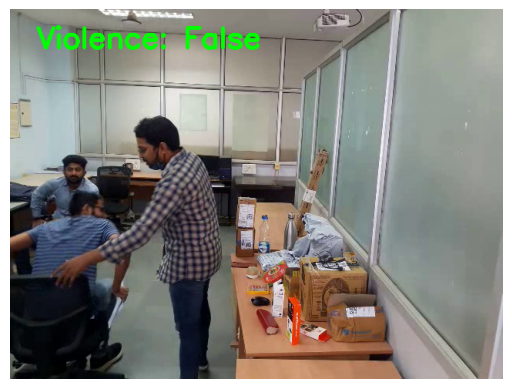

1/1 [==============================] - 0s 94ms/step


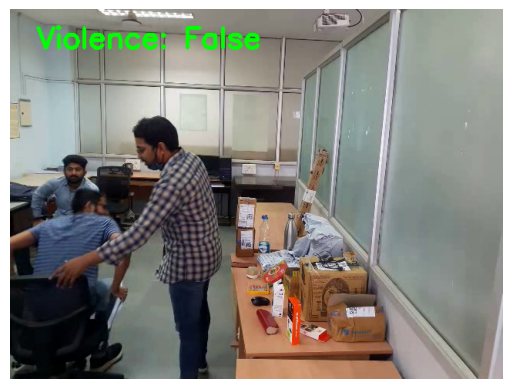

1/1 [==============================] - 0s 88ms/step


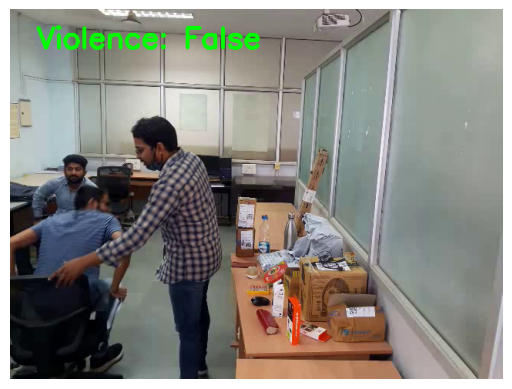

1/1 [==============================] - 0s 90ms/step


KeyboardInterrupt: 

In [9]:
print_results('Testing videos\\abcdefg.mp4')
